In [1]:
from sunlab.suntorch import *

In [2]:
import torch
import numpy as np
from matplotlib import pyplot as plt

# Example Loading Pretrained

In [3]:
import pandas as pd
df = pd.read_csv(DIR_ROOT + "data/spheroid26_011523_filtered.csv")
data = df[['Area', 'MjrAxisLength', 'MnrAxisLength', 'Eccentricity',
        'ConvexArea', 'EquivDiameter', 'Solidity', 'Extent', 'Perimeter',
        'ConvexPerim', 'FibLen', 'InscribeR', 'BlebLen']]
ndata = data / data.max(axis=0)
ndata = ndata.astype(np.single)
df.columns

Index(['Area', 'MjrAxisLength', 'MnrAxisLength', 'Eccentricity', 'ConvexArea',
       'EquivDiameter', 'Solidity', 'Extent', 'Perimeter', 'ConvexPerim',
       'FibLen', 'InscribeR', 'BlebLen', 'Class', 'Frames', 'CellNum',
       'ActinEdge', 'Filopodia', 'Bleb', 'Lamellipodia', 'X-Cent', 'Y-Cent'],
      dtype='object')

In [5]:
aae = AdversarialAutoencoder(13, 2, 16, 8).load(DIR_ROOT + "models/current_model/portable/")

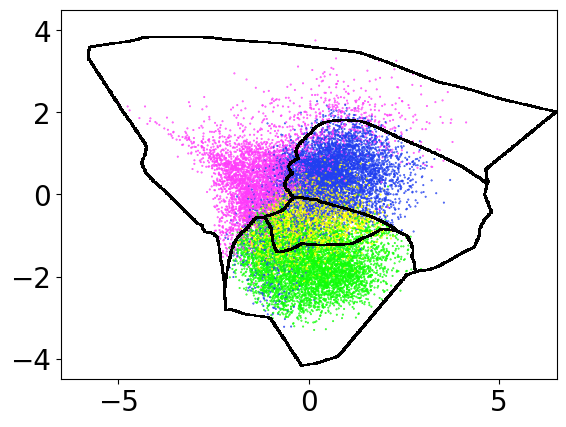

In [6]:
data = aae.encode(torch.tensor(ndata.to_numpy())).detach().cpu().numpy()
c = df['Class'].to_numpy()
# for i in [1,2,3,0]:
#     plt.scatter(data[c==i,0], data[c==i,1], c=c[c==i], cmap=Pmap, vmin=0, vmax=3, s=0.2)
plt.scatter(data[:,0], data[:,1], c=c, cmap=Pmap, s=0.2)
apply_boundary()

# Examples

In [8]:
en = EncoderNetwork(13, 16, 2)
en

EncoderNetwork(
  (lin1): Linear(in_features=13, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=16, bias=True)
  (lin3gauss): Linear(in_features=16, out_features=2, bias=True)
)

In [9]:
de = DecoderNetwork(13, 16, 2)
de

DecoderNetwork(
  (lin1): Linear(in_features=2, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=16, bias=True)
  (lin3): Linear(in_features=16, out_features=13, bias=True)
)

In [10]:
di = DiscriminatorNetwork(8, 2)
di

DiscriminatorNetwork(
  (lin1): Linear(in_features=2, out_features=8, bias=True)
  (lin2): Linear(in_features=8, out_features=8, bias=True)
  (lin3): Linear(in_features=8, out_features=1, bias=True)
)

In [11]:
ae = AutoencoderNetwork(13, 2, 16)
ae

In [12]:
def cplx(x,*args):
    return torch.tensor(np.vstack([np.random.rand(x),np.random.randn(x)]).astype(np.single).T)

In [13]:
aae = AdversarialAutoencoderNetwork(13, 2, 16, 8, distribution=cplx)#torch.randn
aae

In [14]:
aae.init_losses()
aae.init_optimizers()
aae.train_step(torch.randn(128, 13))

In [15]:
v = torch.randn(1000, 13)

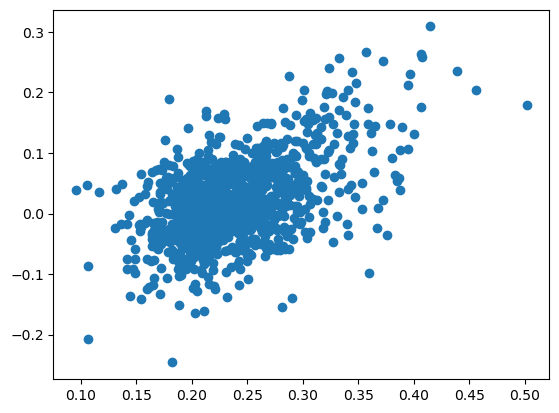

In [16]:
from matplotlib import pyplot as plt
d = aae.encode(v).detach().cpu().numpy()
plt.scatter(d[...,0],d[...,1])

In [17]:
aae.eval()
old = aae(v)
torch.sum(aae(v)-aae(v))

tensor(0., grad_fn=<SumBackward0>)

In [18]:
aae.train()
td = torch.randn(128, 13)
for _ in range(10):
    aae.train_step(td)
aae.eval()
new = aae(v)
torch.sum(old-new)

tensor(15.7180, grad_fn=<SumBackward0>)

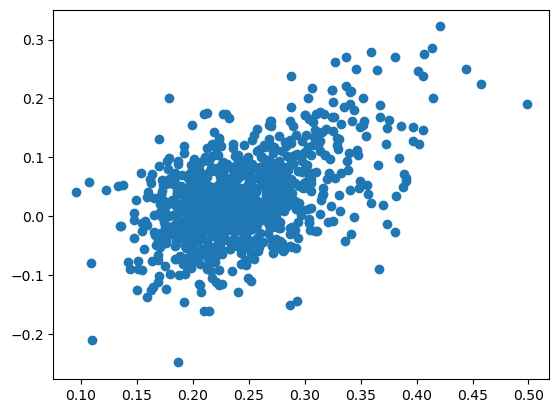

In [19]:
from matplotlib import pyplot as plt
d = aae.encode(v).detach().cpu().numpy()
plt.scatter(d[...,0],d[...,1])

In [20]:
models = [(en,"Encoder"), (de,"Decoder"), (di,"Discriminator"), (ae,"Autoencoder"), (aae,"Adversarial Autoencoder")]
name_max_size = max(map(lambda x: len(x[1]), models))
for model,name in models:
    pcount = sum(p.numel() for p in model.parameters())
    print(f"{name:>{name_max_size}}: {pcount}")

                Encoder: 530
                Decoder: 541
          Discriminator: 105
            Autoencoder: 1071
Adversarial Autoencoder: 1176


In [21]:
from torch import randn
ae(randn(3,13)).shape

torch.Size([3, 13])

In [22]:
AAE_DICT = np.load(DIR_ROOT + "models/current_model/portable/trainable_variables.npy", allow_pickle=True).item()
AAE_DICT

{'ENCODER': {'LAYER_1_WEIGHTS': array([[-0.5752751 ,  0.3111452 , -0.38710392,  0.21246529,  0.06052858,
          -0.46258578,  0.4579332 ,  0.26821458,  0.11801399, -0.18089172,
          -0.4821742 ,  0.27451593,  0.50251764,  0.15193969, -0.3639048 ,
           0.55040246],
         [-0.36673903, -0.03032164, -0.40174338, -0.43520966, -0.04945281,
          -0.24738882, -0.15720403, -0.49901545, -0.11046445,  0.14603199,
           0.11390639, -0.45886463, -0.19885805,  0.45722234, -0.00352207,
          -0.28385416],
         [-0.36950427,  0.19278537, -0.08175364, -0.26459965,  0.27499527,
           0.34826687,  0.5370329 ,  0.26263314,  0.14078005, -0.1352886 ,
          -0.28709286, -0.00181983,  0.4902246 , -0.2145977 , -0.26219267,
           0.12198486],
         [ 0.44472876, -0.3048174 ,  0.08433511,  0.250893  , -0.39762655,
          -0.00324766,  0.17436066, -0.10859049,  0.40895802,  0.20849137,
           0.72239155, -0.60870725,  0.36287796, -0.15463449,  0.518517  

In [23]:
MODELS = [(aae.encoder, "ENCODER"), (aae.decoder, "DECODER"), (aae.discriminator, "DISCRIMINATOR")]
for MODEL, MODEL_NAME in MODELS:
    PNAMES = list(AAE_DICT[MODEL_NAME].keys())
#     print(MODEL_NAME)
    MODEL_state_dict = MODEL.state_dict()
    for idx, param_handle in enumerate(MODEL.named_parameters()):
#         print(PNAMES[idx])
        SAVED_PARAMETER = AAE_DICT[MODEL_NAME][PNAMES[idx]].T
        param_name = list(MODEL_state_dict.keys())[idx]
#         print(param_name)
#         print(list(SAVED_PARAMETER.shape), list(param_handle[1].shape))
#         print(SAVED_PARAMETER.dtype, param_handle[1].dtype)
        MODEL_state_dict[param_name] = torch.tensor(SAVED_PARAMETER)
    MODEL.load_state_dict(MODEL_state_dict)
aae.eval()

In [24]:
import pandas as pd
df = pd.read_csv(DIR_ROOT + "data/spheroid26_011523_exc.csv")
data = df[['Area', 'MjrAxisLength', 'MnrAxisLength', 'Eccentricity',
        'ConvexArea', 'EquivDiameter', 'Solidity', 'Extent', 'Perimeter',
        'ConvexPerim', 'FibLen', 'InscribeR', 'BlebLen']]
df.columns

Index(['Unnamed: 0', 'Area', 'MjrAxisLength', 'MnrAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Solidity', 'Extent', 'Perimeter',
       'ConvexPerim', 'FibLen', 'InscribeR', 'BlebLen', 'Class', 'Frames',
       'CellNum', 'ActinEdge', 'Filopodia', 'Bleb', 'Lamellipodia', 'X-Cent',
       'Y-Cent'],
      dtype='object')

In [25]:
ndata = data / data.max(axis=0)
ndata = ndata.astype(np.single)

In [26]:
ind = torch.rand(1000,13)

In [27]:
data = aae.encode(torch.tensor(ndata.to_numpy())).detach().cpu().numpy()

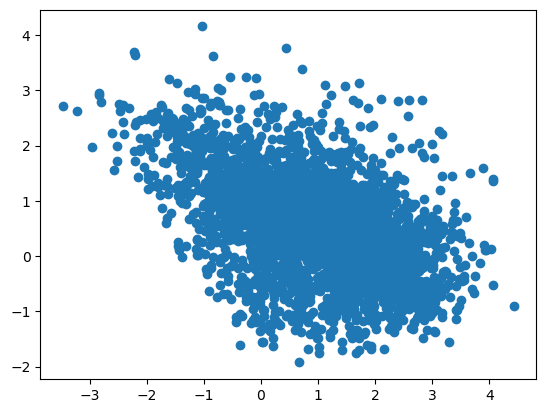

In [28]:
plt.scatter(data[:,0], data[:,1])

In [29]:
# aae.save("../../models/current_model/portable/")

In [31]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd

In [108]:
def split_on_class(data, _class, p=0.5, shuffle=True, dtype=np.single):
    split_prior = int(np.floor(data.shape[0] * p))
    _c, counts = np.unique(_class, return_counts=True)
    split = min(split_prior//len(counts), min(counts))
    if shuffle:
        both = np.hstack([data,_class.reshape((-1,1))])
        both = both[np.random.permutation(both.shape[0]),:]
        data = both[:,:-1]
        _class = both[:,-1]

    training_datasets = []
    training_classes = []
    validation_datasets = []
    validation_classes = []
    for c in _c:
        temp_ds = data[_class==c,:]
        temp_cs = _class[_class==c]
        training_datasets.append(temp_ds[:split,:])
        training_classes.append(temp_cs[:split].reshape((-1,1)))
        validation_datasets.append(temp_ds[split:,:])
        validation_classes.append(temp_cs[split:].reshape((-1,1)))
    training_dataset = np.vstack(training_datasets)
    validation_datasets = np.vstack(validation_datasets)
    training_classes = np.vstack(training_classes)
    validation_classes = np.vstack(validation_classes)
    if shuffle:
        training = np.hstack([training_dataset,training_classes.reshape((-1,1))])
        validation = np.hstack([validation_datasets,validation_classes.reshape((-1,1))])
        training = training[np.random.permutation(training.shape[0]),:]
        validation = validation[np.random.permutation(validation.shape[0]),:]
    training_dataset = training[:,:-1].astype(dtype)
    training_classes = training[:,-1].astype(dtype)
    validation_datasets = validation[:,:-1].astype(dtype)
    validation_classes = validation[:,-1].astype(dtype)
    return (training_dataset, validation_datasets), (training_dataset, training_classes)

# PyTorch Training Example

In [166]:
df = pd.read_csv(DIR_ROOT + "data/spheroid26_011523_filtered.csv")
data = df[['Area', 'MjrAxisLength', 'MnrAxisLength', 'Eccentricity',
        'ConvexArea', 'EquivDiameter', 'Solidity', 'Extent', 'Perimeter',
        'ConvexPerim', 'FibLen', 'InscribeR', 'BlebLen']]
ndata = data / data.max(axis=0)
training_data = ndata.astype(np.single).to_numpy()
# training_data = training_data[np.random.permutation(training_data.shape[0]),:]
# split = training_data.shape[0]//2
# validation_data = training_data[split:,:]
# training_data = training_data[:split,:]
df.columns

Index(['Area', 'MjrAxisLength', 'MnrAxisLength', 'Eccentricity', 'ConvexArea',
       'EquivDiameter', 'Solidity', 'Extent', 'Perimeter', 'ConvexPerim',
       'FibLen', 'InscribeR', 'BlebLen', 'Class', 'Frames', 'CellNum',
       'ActinEdge', 'Filopodia', 'Bleb', 'Lamellipodia', 'X-Cent', 'Y-Cent'],
      dtype='object')

In [167]:
(training_data, validation_data), (_, _) = split_on_class(training_data, df['Class'].to_numpy())

In [168]:
training_aae = AdversarialAutoencoderNetwork(13, 2, 14, 7, distribution=torch.randn)
training_aae.init_losses()
training_aae.init_optimizers(0.0007, 0.0003)
training_aae.cuda()

In [169]:
BATCH_SIZE = 512
EPOCHS = 16000

In [170]:
iter_count = training_data.shape[0]//BATCH_SIZE

In [171]:
training_aae.train()

In [172]:
losses = []
pbar = tqdm(range(EPOCHS))
for _ in pbar:
    for step in range(iter_count):
        tensor = torch.tensor(training_data[step*BATCH_SIZE:(step+1)*BATCH_SIZE,:])
        training_aae.train_step(tensor)
    losses.append([loss.item() for loss in training_aae.losses()])
    (loss,dloss,gloss) = (*losses[-1],)
    training_aae.eval()
    validation_tensor = torch.tensor(validation_data)
    validation_recon = training_aae(validation_tensor).detach().cpu().numpy()
    validation_mae = np.mean(np.abs(validation_data - validation_recon))
    training_aae.train()
    pbar.set_postfix({
        "recon_loss": f"{loss:.2e}",
        "D_loss": f"{dloss:.2e}",
        "G_loss": f"{gloss:.2e}",
        "V_MAE": f"{validation_mae:.2e}",
    })
#     pbar.set_description(f"{loss=:.3e}  {dloss=:.3e} {gloss=:.3e}")

  0%|          | 0/16000 [00:00<?, ?it/s]

In [173]:
training_aae.eval()

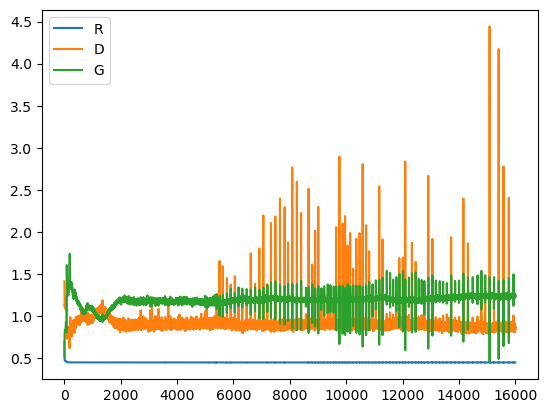

In [174]:
from matplotlib import pyplot as plt
losses = np.array(losses)
plt.plot(losses)
plt.legend(['R', 'D', 'G'])
_ = _

In [175]:
loc = training_aae.encode(torch.tensor(ndata.astype(np.single).to_numpy())).detach().cpu().numpy()

0.021007575

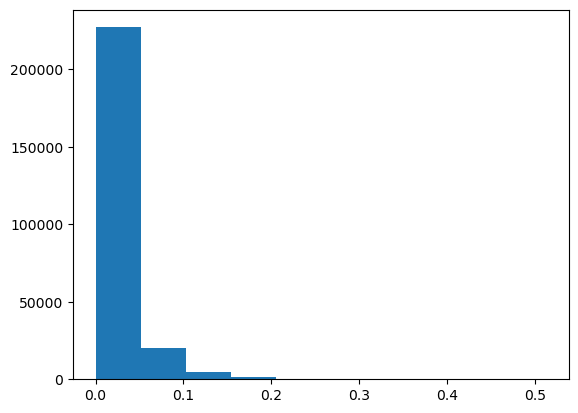

In [176]:
in_value = ndata.astype(np.single).to_numpy()
ot_value = training_aae(torch.tensor(in_value)).detach().cpu().numpy()
deviation = np.abs(in_value - ot_value).flatten()
plt.hist(deviation)
np.mean(deviation)

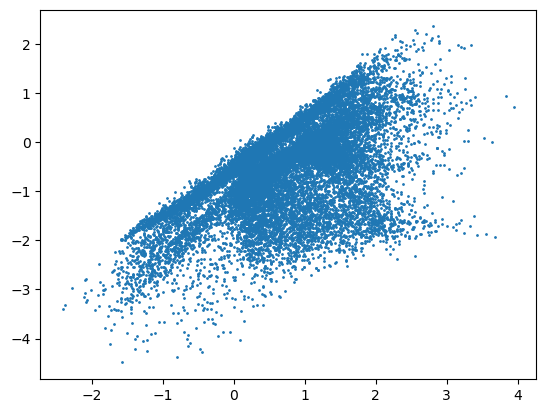

In [177]:
plt.scatter(loc[:,0], loc[:,1], s=1)

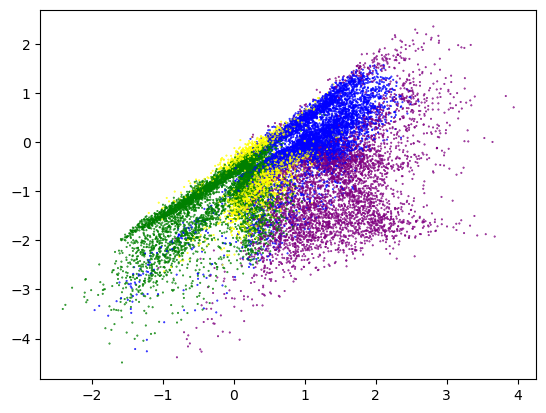

In [178]:
# loc = torch.randn(loc.shape[0],2).detach().cpu().numpy()
c = df['Class'].to_numpy()
plt.scatter(loc[:,0], loc[:,1], c=c, cmap=Pmap, vmin=0, vmax=3, s=0.2)